# ML-Supervised Linear Regression

Mean Squared Error: 20.64
R-squared: 0.91


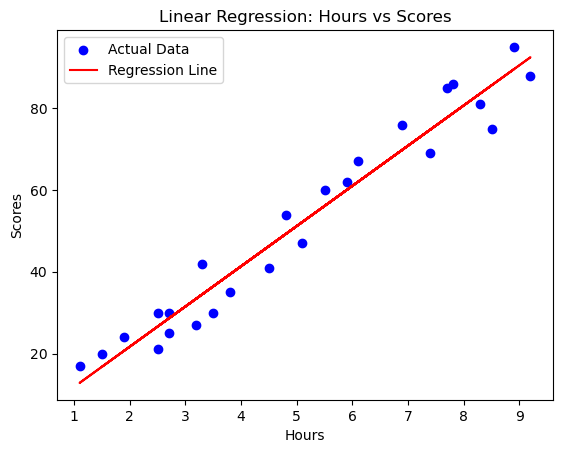

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt




df=pd.read_csv('/Users/gottumukkalasaimanojvarma/Desktop/ML-Supervised Learning/score.csv')






# Split the data into features (X) and target (y)
X = df.drop('Scores', axis=1)  # Features
y = df[['Scores']].values.reshape(-1)       # Target



X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=100)

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred=model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(scaler.transform(X)), color='red', label='Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.title('Linear Regression: Hours vs Scores')
plt.show()



In [11]:
def predict_score():
    user_input = float(input("Enter study hours: "))
    user_input_scaled = scaler.transform([[user_input]])  # Scale the input
    predicted_score = model.predict(user_input_scaled)[0]  # Predict the score
    print(f"Predicted Score for {user_input} hours of study: {predicted_score:.2f}")

# Call the function to take user input and make a prediction
predict_score()

Enter study hours: 3
Predicted Score for 3.0 hours of study: 31.50


/Users/gottumukkalajnanasanjana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# Compare predictions with actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


   Actual  Predicted
0      25  28.545123
1      35  39.364112
2      42  34.446390
3      62  60.018545
4      20  16.742590
